<a href="https://colab.research.google.com/github/MFarfan402/ML_CollabRepository/blob/main/Neurona_190423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neurona - 190423
### *por Rodrigo Camacho*, June, 2022
### *Mauricio Farfan, Eric Martinez, Luis Ramos, Luis Martinez, Laisha Riestra, Rafael Magaña*


In [ ]:
import torch  # Linea básica para precargar los módulos de Pytorch

In [ ]:
from torchvision import datasets # Módulo que nos permite llenar el dataset 
                                 # para entrenar nuestro modelo
import torchvision

In [ ]:
# A veces los datasets no vienen en el formato que queremos. Este módulo nos 
# ayuda para darles el formato adecuado.
import torchvision.transforms as transforms                                  
# Este modulo sirve para el manejo de imágenes.
import torchvision.utils as vision_utils 
# Este otro contiene diferentes algoritmos de aprendizaje.
import torch.optim as optim
import torch.utils as utils
import numpy as np

In [ ]:
batchSize = 50

In [ ]:
complete_ds = datasets.MNIST('../data', train=True, download=True)

transform = transforms.ToTensor()
complete_ds.transform = transform

complete_loader = utils.data.DataLoader(complete_ds, batch_size=int(len(complete_ds)), shuffle=True) 

import matplotlib.pyplot as plt

images, labels = next(iter(complete_loader))

In [ ]:
complete_loader = utils.data.DataLoader(
    complete_ds,
    batch_size=len(complete_ds),
    shuffle=True)
def mean_std(loader):
  images, lebels = next(iter(loader))
  mean, std = images.mean(), images.std()
  return mean, std
mean, std = mean_std(complete_loader)

In [ ]:
#transform = transforms.ToTensor()
#complete_ds.transform = transform
#print(type(complete_ds[0][0]))

# Cada ejemplo en los data sets son una tupla (image:PIL[1,28,28],label:int)
complete_ds_normal = datasets.MNIST('../data', train=True, download=True)

transform_normal = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
complete_ds_normal.transform = transform_normal

train_ds, validation_ds, test_ds = torch.utils.data.random_split(complete_ds_normal, [int(len(complete_ds_normal)*.7), int(len(complete_ds_normal)*.2), int(len(complete_ds_normal)*.1)])

print("Tipo de imagen antes de la transformación:", type(train_ds[0][0]))

# Imprimira que tiene 60k datapoints o imagenes, en este caso, ubicadas en
# cierta direccion y que son parte del "Train"
print(len(train_ds))
print(len(validation_ds))
print(len(test_ds))

Tipo de imagen antes de la transformación: <class 'torch.Tensor'>
42000
12000
6000


In [ ]:
# # Se crea dataloader para separar la información
train_loader = utils.data.DataLoader(train_ds, batch_size=batchSize, shuffle=True) 
validation_loader = utils.data.DataLoader(validation_ds, batch_size=batchSize, shuffle=True) 
test_loader = utils.data.DataLoader(test_ds, batch_size=batchSize, shuffle=True) 

In [ ]:
# # Se separa la información
trainloader_iterator = iter(train_loader)
imagesTrain, labelsTrain = next(trainloader_iterator) 

validationloader_iterator = iter(validation_loader)
imagesValidation, labelsValidation = next(validationloader_iterator) 

testloader_iterator = iter(test_loader)
imagesTest, labelsTest = next(testloader_iterator) 

In [ ]:
# Definimos nuestras variables con sus dimensiones
n_batches = 10
C = 3
H = 28
W = 28
total_pxs = C*H*W
shape = (n_batches, C, H, W) 

# Obtenemos el tensor dada cierta forma o dimension.
rand_image = torch.rand(shape)

# Imprimimos los resultados
print(f'Dimensione del random image: {rand_image.shape}')
print(f'El arreglo plano debe de ser de la forma [{n_batches}, {total_pxs}]')

Dimensione del random image: torch.Size([10, 3, 28, 28])
El arreglo plano debe de ser de la forma [10, 2352]


In [ ]:
# Lo ejecutamos con las funciones adecuadas
a_flatten_layer = torch.nn.Flatten(start_dim=1)
flattened_image = a_flatten_layer(rand_image)
print(f'El resultado es de la forma: {flattened_image.shape}')

El resultado es de la forma: torch.Size([10, 2352])


In [ ]:
N = 15  # Numero de neuronas en el ejemplo. Tambien el numero de salida.
a_linear_layer = torch.nn.Linear(total_pxs,N)
output = a_linear_layer(flattened_image)

print('Las dimensiones de nuestro tensor son:')
print(output.shape)

print('El tamaño de los pesos son:[N, total_pxs]:')
print(a_linear_layer.weight.shape)

Las dimensiones de nuestro tensor son:
torch.Size([10, 15])
El tamaño de los pesos son:[N, total_pxs]:
torch.Size([15, 2352])


In [ ]:
C = 1  # Cantidad de imagenes
H = 28  # 28 pixels de altura
W = 28  # 28 pixels de ancho
n_inputs = C*H*W  # Numero total de pixels
net = 0

# Definiremos una funcion para configurar las arquitecturas y probar distintos modelos
def configArchitecture(variation):
  global net 
  # Caso BASE
  if variation == 0:
    
    N1 = 800  # Numero de neuronas en la primera capa
    n_outputs = 10  # Numero de neuronas en la segunda capa, la de salida
    net = torch.nn.Sequential(
          torch.nn.Flatten(start_dim=1),  # Empezar en 2D para preservar el tamaño del batch
          torch.nn.Linear(n_inputs, N1),  # n_inputs connectadas a la primera neurona
          torch.nn.ReLU(), 
          torch.nn.Linear(N1, n_outputs), # N1 salidas de la ultima capa son entradas para esta capa con n_outputs neuronas
    )
    #optimizer = optim.SGD(net.parameters(), lr=0.001)
  
  # Caso VARIACION 1
  elif variation == 1:
    N1 = 4000 # Misma cantidad de neuronas en la capa 1
    N2 = 300  # Menor cantidad de neuronas en la capa 2
    N3 = 100  # Menor cantidad de neuronas en la capa 3
    N4 = 50  # Menor cantidad de neuronas en la capa 4
    n_outputs = 10  # Numero de neuronas en la segunda capa, la de salida
    net = torch.nn.Sequential(
          torch.nn.Flatten(start_dim=1),
          torch.nn.Linear(n_inputs, N1),
          torch.nn.Linear(N1, N2),  # Agregamos la segunda capa al modelo
          torch.nn.ReLU(), 
          torch.nn.Linear(N2, N3),  # Agregamos la tercera capa al modelo
          torch.nn.ReLU(), 
          torch.nn.Linear(N3, N4),  # Agregamos la cuarta capa al modelo
          torch.nn.ReLU(), 
          torch.nn.Linear(N4, n_outputs),
    )
    #optimizer = optim.SGD(net.parameters(), lr=0.001)
    
    # Caso VARIACION 2
  elif variation == 2:
    N1 = 4000 # Misma cantidad de neuronas en la capa 1
    n_outputs = 10  # Numero de neuronas en la segunda capa, la de salida 
    net = torch.nn.Sequential(
          torch.nn.Flatten(start_dim=1),
          torch.nn.Linear(n_inputs, N1),
          torch.nn.ReLU(), 
          torch.nn.Linear(N1, n_outputs),
    )
    #optimizer = optim.SGD(net.parameters(), lr=0.001)

    # Caso VARIACION 3
  elif variation == 3:
    N1 = 800  # Numero de neuronas en la primera capa
    n_outputs = 10  # Numero de neuronas en la segunda capa, la de salida
    net = torch.nn.Sequential(
          torch.nn.Flatten(start_dim=1),  # Empezar en 2D para preservar el tamaño del batch
          torch.nn.Linear(n_inputs, N1),  # n_inputs connectadas a la primera neurona
          torch.nn.ReLU(), 
          torch.nn.Linear(N1, n_outputs), # N1 salidas de la ultima capa son entradas para esta capa con n_outputs neuronas
          torch.nn.ReLU(), 
    )
    #optimizer = optim.SGD(net.parameters(), lr=0.001)

# Entrenando
Momento de entrenarlo. Para esto necesitamos definir un criterio de error o perdida. Definiremos el algoritmo de entrenamiento. Y finalmente, definiremos el loop para consumir el dataset, computar la perdida, el gradiente y llamar al optimizador para ajustar nuestrso pesos en nuestra RN. 



In [ ]:
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
# optimizer = optim.SGD(net.parameters(), lr=0.001)

In [ ]:
# Definimos una funcion para guardar la información del modelo

# netTrainedBase
batch_listBase = []
loss_listBase = []

# netTrainedVariation
batch_listV1 = []
loss_listV1 = []

# netTrainedVariation2
batch_listV2 = []
loss_listV2 = []

# netTrainedVariation3
batch_listV3 = []
loss_listV3 = []

# Definimos una funcion que permita ejecutar el loop de entrenamiento
def trainingLoop(trainedModelName, color):
    global net
    global batchSize

    optimizer = optim.SGD(net.parameters(), lr=0.001)
    num_list = []
    num_list_aux = []
    num_list_validation = []
    batch_list= []
    lossByEpoch_list = []
    lossByEpoch_validation_list = []

    n_epochs = 15  # Numero de epocas que van a ser entrenadas
    for epoch in range(n_epochs):  # range(int_x) convierte el entero en una lista de 0 a int_x
      for batch_idx, data in enumerate(train_loader):  # consume the dataset.
        # Obtenemos las entradas
        inputs, labels = data

        # Parametro gradiente para obtener de cada batch.
        optimizer.zero_grad() 

        # Forward pass
        outputs = net(inputs)

        # Computar la perdida
        loss = criterion(outputs, labels)

        # Propagacion inversa.
        loss.backward()

        # Optimizador.
        optimizer.step()

        # Imprimir las estadisticas.
        #if batch_idx % 100 == 0:    # Imprimir cada 100 muestras.
            #print(f'[{epoch}, {batch_idx:5d}] loss: {loss.item():.3f}')
            
        # Añadimos todas las perdidas en una lista para graficarlas
        num_list.append(loss.item())
        num_list_aux.append(loss.item())
        counter = epoch*(int(len(train_loader)))
        batch_list.append(batch_idx + counter)

      # VALIDATION COMPUTE
      for batch_idx, data in enumerate(validation_loader):  # consume the dataset.
        # Obtenemos las entradas
        inputs, labels = data

        # Parametro gradiente para obtener de cada batch.
        optimizer.zero_grad() 

        # Forward pass
        outputs = net(inputs)

        # Computar la perdida
        loss = criterion(outputs, labels)

        # Añadimos todas las perdidas en una lista para graficarlas
        num_list_validation.append(loss.item())

      sum = 0
      sum_validation = 0
      for value in num_list_aux:
        sum += value
      for value in num_list_validation:
        sum_validation += value
      lossByEpoch_list.append(sum / len(num_list_aux))
      lossByEpoch_validation_list.append(sum_validation / len(num_list_validation))
      num_list_aux.clear()
      num_list_validation.clear()

    graph2(lossByEpoch_list, lossByEpoch_validation_list, trainedModelName + "_loss_vs_epoch", color)


    if trainedModelName == 'netTrainedBase':
      global batch_listBase
      global loss_listBase
      batch_listBase = list(batch_list)
      loss_listBase = list(num_list)
    elif trainedModelName == 'netTrainedV1':
      global batch_listV1
      global loss_listV1
      batch_listV1 = list(batch_list)
      loss_listV1 = list(num_list)
    elif trainedModelName == 'netTrainedV2':
      global batch_listV2
      global loss_listV2
      batch_listV2 = list(batch_list)
      loss_listV2 = list(num_list) 
    elif trainedModelName == 'netTrainedV3':
      global batch_listV3
      global loss_listV3
      batch_listV3 = list(batch_list)
      loss_listV3 = list(num_list) 

    torch.save(net, trainedModelName + '.pth')
    graph(batch_list, num_list, trainedModelName + "Graph", color)
    np.savetxt(trainedModelName + 'Data.csv', np.column_stack((batch_list, num_list)), delimiter = ',')   

In [ ]:
# Definimos una funcion que nos ayuda a graficar y a guardar la imagen de la grafica.

import matplotlib.pyplot as plt
import numpy as np

def graph (xAxis, yAxis, graphName, color):
    plt.plot(xAxis, yAxis, color)

    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.title("Loss vs Batch")
    plt.savefig(graphName + ".jpg")
    plt.show()

def graph2 (yAxis, yAxisValidation, graphName, color):
    xValues = []
    for value in range((len(yAxis))) :
      xValues.append(value)
    plt.plot(xValues, yAxis, color)
    plt.plot(xValues, yAxisValidation, 'k')

    plt.legend(['Trained model', 'Validation Model'])

    plt.xlabel("Epoch")
    plt.ylabel("Mean Loss")
    plt.title("Loss vs Epoch")
    plt.savefig(graphName + ".jpg")
    plt.show()
  
  
def graphMatrix (matrix, matrixName):
    plt.imshow(matrix, cmap='PuBu')
    plt.colorbar()

    plt.xlabel('Predicted')
    plt.ylabel('Expected')
  
    plt.xticks(range(10))
    plt.yticks(range(10))
    
    plt.savefig(matrixName + ".jpg")

###**Ciclo de pruebas**
A continuación se presenta el código para realizar el ciclo de pruebas.

In [ ]:
# Red neuronal en modo evaluacion
import pandas

def testCycle(name):
  global net
  net.eval()

  # Inicializacion de matriz [10][10] con 0 en cada posición
  matrix = np.zeros((10,10))
  # Se desactiva el gradiente
  with torch.no_grad():
    
    for batch_idx, data in enumerate(test_loader):
        inputs, labels = data
        outputs = net(inputs)
        
        # Calculo y almacenamiento de valores predecidos
        numPredicted = torch.argmax(outputs, dim = 1)
        arrayPredicted = np.array(numPredicted)
        np.savetxt('predicted' + name + '.csv', arrayPredicted, delimiter = ',')

        # Cálculo y almacenamiento de valores esperados
        numExpected = labels
        arrayExpected = np.array(numExpected)
        np.savetxt('expected' + name + '.csv', arrayExpected, delimiter = ',')

        matrix[numPredicted,numExpected] += 1

        matrixData = pandas.DataFrame(matrix, columns=range(10), index=range(10))
        matrixData.to_csv('confusionMatrixData' + name + '.csv')

    #print(matrix)
    return matrix

###**Calculo de valores**

Calculamos los valores para accuracy, precision, recall, specificity.

In [ ]:
import csv

def calculateMatrix2x2(matrix, matrixName):
  # Calculamos TP que son los valores en la diagonal de la matriz
  TP = np.diag(matrix)
  # Calculamos FP en base a los TP
  FP = np.sum(matrix, axis=0) - TP
  # Calculamos FN en base a los TP
  FN = np.sum(matrix, axis=1) - TP
  # Finalmente calculamos TN que son los valores restantes
  TN = np.sum(matrix) - TP - FP - FN

  # Calculamos Accuracy, Precision, Recall y Specificity
  accuracy = (np.sum(TP) / np.sum(matrix)) * 100
  precision = (TP / (TP + FP)) * 100
  recall = (TP / (TP + FN)) * 100
  specificity = (TN / (TN + FP)) * 100

  print("ACCURACY: ", accuracy)
  print("PRECISION: ", precision)
  print("RECALL: ", recall)
  print("SPECIFICITY: ", specificity)

  # Se almacenan los resultados
  with open(matrixName + '.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Métrica', 'Resultado'])
    writer.writerow(['Exactitud del modelo', f"{accuracy:.2f}%"])
    for i in range(10):
      writer.writerow(['Precision muestra ' + str(i + 1), f"{precision[i]:.2f}%"])
    for i in range(10):
      writer.writerow(['Recall muestra' + str(i + 1), f"{recall[i]:.2f}%"])
    for i in range(10):
      writer.writerow(['Specificity muestra' + str(i + 1), f"{specificity[i]:.2f}%"])

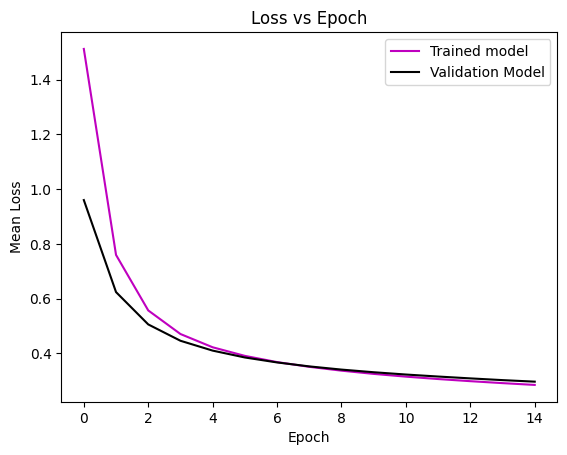

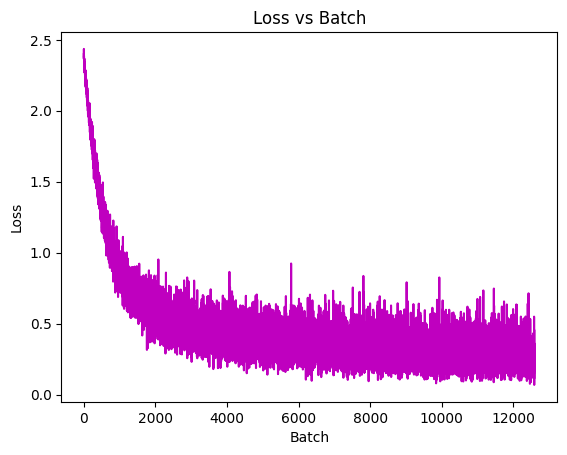

ACCURACY:  70.40332147093713
PRECISION:  [88.14814815 84.50704225 62.10526316 65.55555556 73.58490566 65.74585635
 81.37931034 73.91304348 55.34883721 67.41573034]
RECALL:  [77.27272727 72.72727273 69.00584795 66.66666667 67.24137931 68.
 78.14569536 75.79617834 65.38461538 66.66666667]
SPECIFICITY:  [98.95561358 98.55358317 95.24752475 95.89131875 97.22222222 95.89675711
 98.24104235 97.25310661 93.61702128 96.14873838]


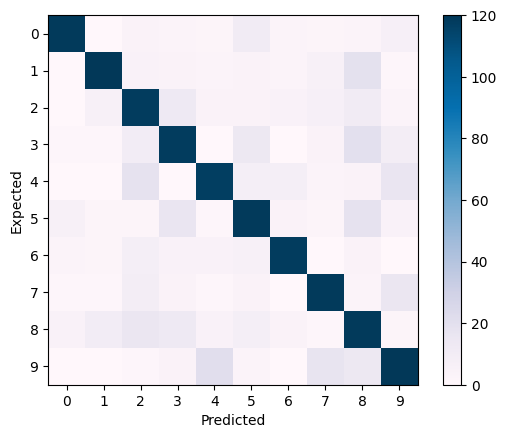

In [ ]:
# Para cada variacion del modelo: 
# 1. Guardamos el modelo sin entrenar.
# 2. Lo entrenamos y graficamos.

# Modelo base
configArchitecture(0)
torch.save(net, 'netNoTrainingBase.pth')
trainingLoop('netTrainedBase', 'm')
matrix = testCycle('netTrainedBaseTest')
graphMatrix(matrix, 'netTrainedBaseMatrix')
calculateMatrix2x2(matrix,'netTrainedBaseResults')

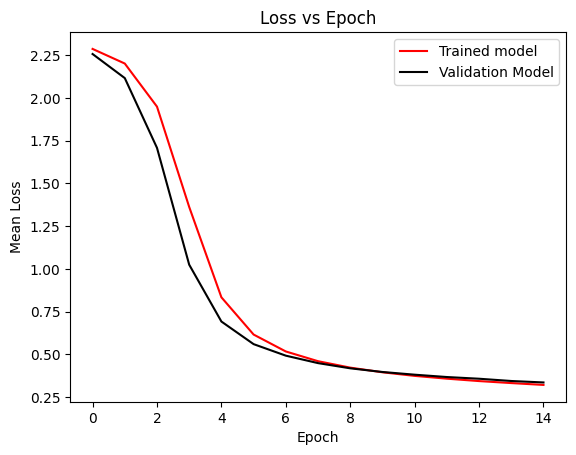

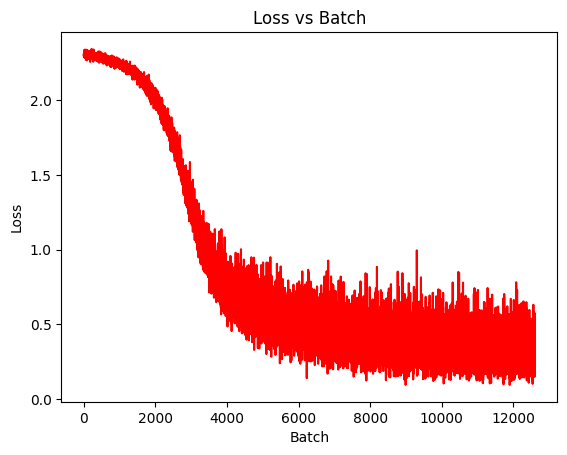

ACCURACY:  68.43623773802653
PRECISION:  [88.23529412 80.53691275 58.5        59.2039801  74.375      64.13043478
 75.97402597 73.45679012 57.48792271 65.55555556]
RECALL:  [78.43137255 73.17073171 68.02325581 70.41420118 65.38461538 65.19337017
 72.67080745 73.45679012 62.63157895 59.29648241]
SPECIFICITY:  [98.98734177 98.15168897 94.68289558 94.75703325 97.35654417 95.74742268
 97.64631043 97.26288988 94.29682437 95.95827901]


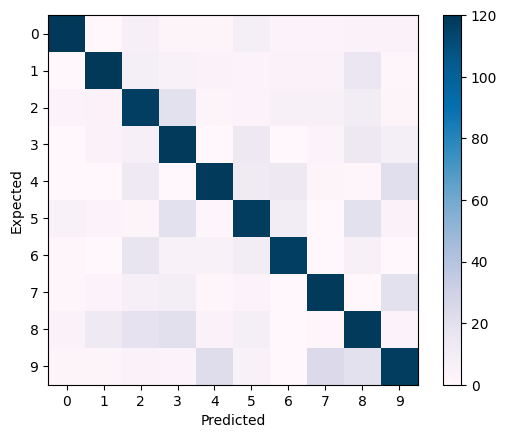

In [ ]:
# Ejecutamos las siguientes variaciones:

# Variacion 1
configArchitecture(1)
torch.save(net, 'netNoTrainingVariation1.pth')
trainingLoop('netTrainedV1', 'r')
matrixV1 = testCycle('netTrainedV1Test')
graphMatrix(matrixV1, 'netTrainedV1Matrix')
calculateMatrix2x2(matrixV1,'netTrainedV1Results')

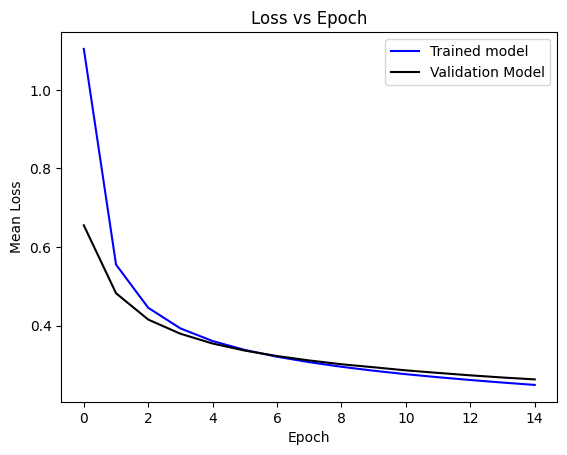

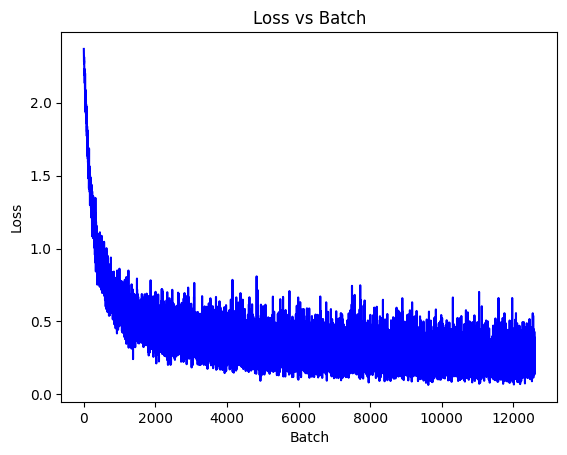

ACCURACY:  73.96156230626161
PRECISION:  [89.55223881 86.95652174 65.2173913  68.96551724 75.         73.6196319
 81.81818182 76.77419355 61.13989637 70.41420118]
RECALL:  [82.75862069 77.92207792 73.6196319  71.85628743 70.58823529 73.6196319
 80.68965517 75.79617834 68.60465116 67.23163842]
SPECIFICITY:  [99.04632153 98.76627827 95.5862069  96.26556017 97.22799723 97.03448276
 98.22888283 97.52747253 94.79528105 96.51810585]


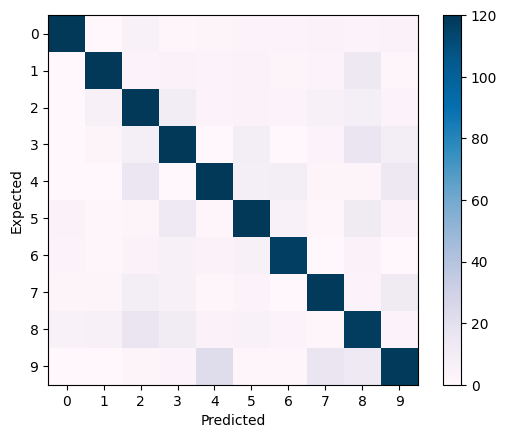

In [ ]:
# Variacion 2
configArchitecture(2)
torch.save(net, 'netNoTrainingVariation2.pth')
trainingLoop('netTrainedV2', 'b')
matrixV2 = testCycle('netTrainedV2Test')
graphMatrix(matrixV2, 'netTrainedV2Matrix')
calculateMatrix2x2(matrixV2,'netTrainedV2Results')

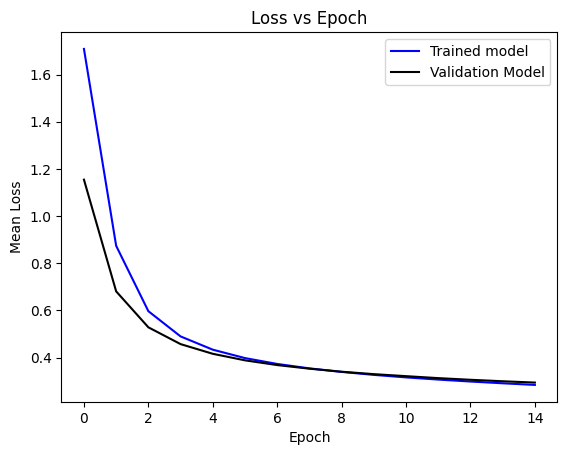

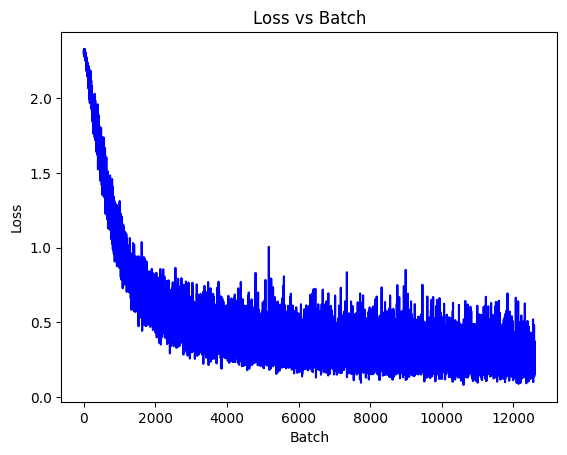

ACCURACY:  71.55742633794347
PRECISION:  [86.33093525 83.33333333 62.10526316 64.67391304 74.375      70.65868263
 79.19463087 76.77419355 59.5        68.57142857]
RECALL:  [80.         77.92207792 71.51515152 70.83333333 70.         67.81609195
 77.63157895 74.375      65.74585635 63.49206349]
SPECIFICITY:  [98.74421679 98.40954274 95.19359146 95.65217391 97.25385131 96.70920081
 97.94837856 97.60479042 94.53441296 96.26865672]


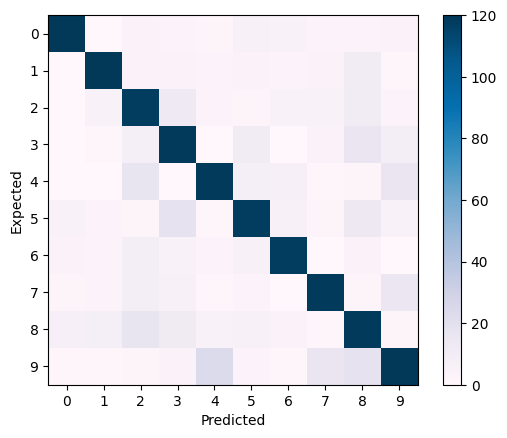

In [ ]:
# Variacion 3 (Sigmoide)
configArchitecture(3)
torch.save(net, 'netNoTrainingVariation3.pth')
trainingLoop('netTrainedV3', 'b')
matrixV3 = testCycle('netTrainedV3Test')
graphMatrix(matrixV3, 'netTrainedV3Matrix')
calculateMatrix2x2(matrixV3,'netTrainedV3Results')

###**Grafica del conjunto de modelos**

Finalmente se gráfican los 3 modelos en conjunto, mostrando sus respectivas pérdidas por batch.

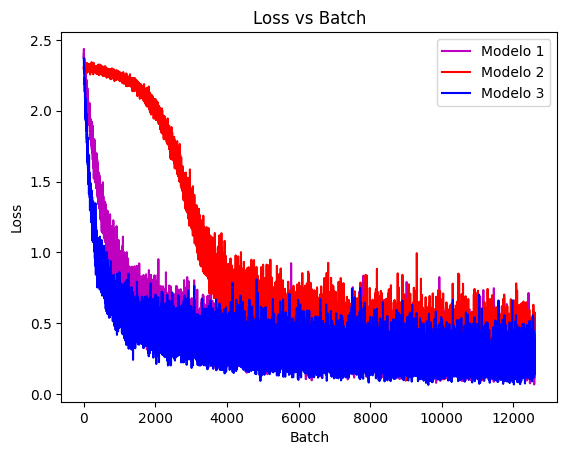

In [ ]:
import matplotlib.pyplot as plt

# Se grafica cada modelo
plt.plot(batch_listBase, loss_listBase, 'm')
plt.plot(batch_listV1, loss_listV1, 'r')
plt.plot(batch_listV2, loss_listV2, 'b')

plt.xlabel("Batch")
plt.ylabel("Loss")
plt.title("Loss vs Batch")

# Se imprime la leyenda de cada modelo
plt.legend(['Modelo 1', 'Modelo 2', 'Modelo 3'])
plt.savefig("finalGraph.jpg") 
plt.show

# Convertimos las listas en arreglos numpy para poder guardar la informacion
arrayXModel1 = np.array(batch_listBase)
arrayYModel1 = np.array(loss_listBase)
arrayXModel2 = np.array(batch_listV1)
arrayYModel2 = np.array(loss_listV1)
arrayXModel3 = np.array(batch_listV2)
arrayYModel3 = np.array(loss_listV2)

# Guardo los arreglos en un archivo csv
np.savetxt('arraysModel1.csv', np.column_stack((arrayXModel1, arrayYModel1)), delimiter = ',')
np.savetxt('arraysModel2.csv', np.column_stack((arrayXModel2, arrayYModel2)), delimiter = ',')
np.savetxt('arraysModel3.csv', np.column_stack((arrayXModel3, arrayYModel3)), delimiter = ',')